<a href="https://colab.research.google.com/github/Neermalsha/Information-Retrieval-/blob/main/Building%20and%20Evaluating%20a%20Neural%20Network%20Classifier%20for%20Seattle%20Weather%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
# Load the dataset to inspect its structure and contents
file_path = '/content/drive/MyDrive/seattle-weather.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
dataset.head(), dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


(         date  precipitation  temp_max  temp_min  wind  weather
 0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
 1  2012-01-02           10.9      10.6       2.8   4.5     rain
 2  2012-01-03            0.8      11.7       7.2   2.3     rain
 3  2012-01-04           20.3      12.2       5.6   4.7     rain
 4  2012-01-05            1.3       8.9       2.8   6.1     rain,
 None)

In [8]:
# Drop the 'date' column as it's not relevant for modeling
data = dataset.drop(columns=['date'])

# Encode the target variable ('weather') using LabelEncoder
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])

# Separate features and target variable
X = data.drop(columns=['weather'])
y = data['weather']

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1168, 4), (293, 4), (1168,), (293,))

In [9]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3215 - loss: 1.5297 - val_accuracy: 0.6280 - val_loss: 1.1849
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6626 - loss: 1.1044 - val_accuracy: 0.6860 - val_loss: 1.0007
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6696 - loss: 0.9774 - val_accuracy: 0.6997 - val_loss: 0.9282
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6975 - loss: 0.8944 - val_accuracy: 0.7304 - val_loss: 0.8666
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7334 - loss: 0.8109 - val_accuracy: 0.7338 - val_loss: 0.8091
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7354 - loss: 0.7988 - val_accuracy: 0.7440 - val_loss: 0.7634
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7531 - loss: 0.7306 - val_accuracy: 0.7645 - val_loss: 0.7305
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7537 - loss: 0.7164 - val_accuracy: 0.7645 - val_loss

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.5727
Test Accuracy: 0.8089


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Confusion Matrix:
[[  0   0   1   0   8]
 [  0   0   1   0  24]
 [  0   0 107   0  13]
 [  0   0   5   2   1]
 [  0   0   3   0 128]]

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.91      0.89      0.90       120
        snow       1.00      0.25      0.40         8
         sun       0.74      0.98      0.84       131

    accuracy                           0.81       293
   macro avg       0.53      0.42      0.43       293
weighted avg       0.73      0.81      0.76       293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


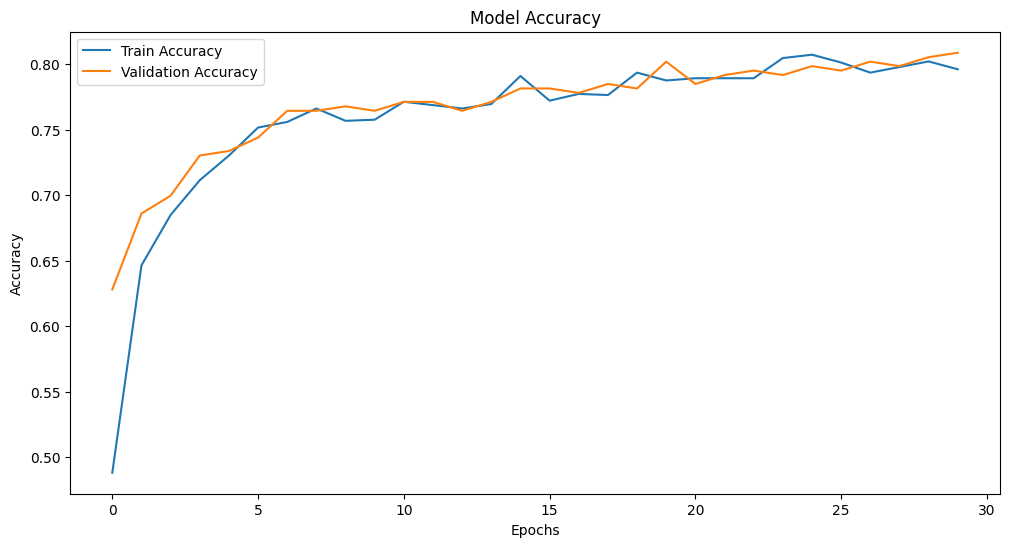

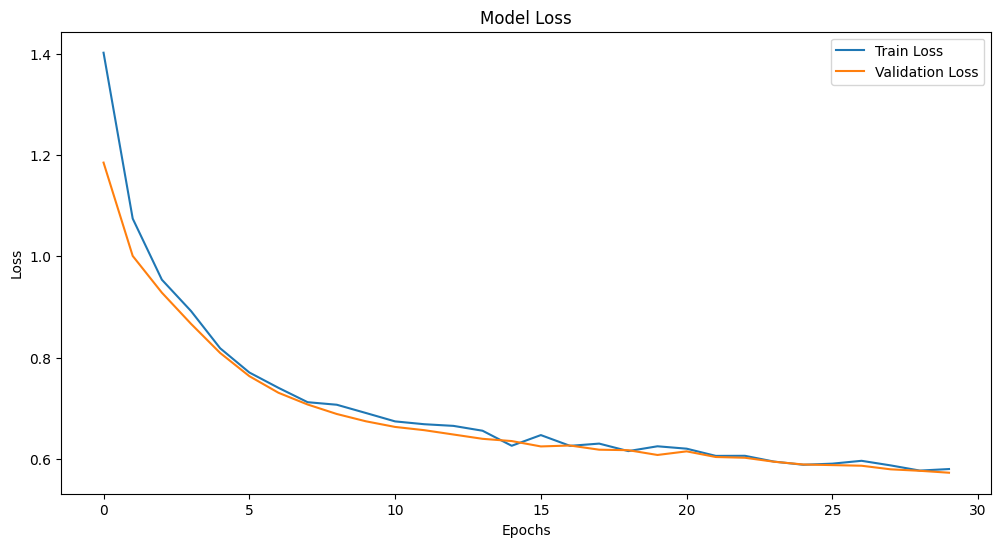

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
